**AQUÍ INICIA LA TRAVESÍA**

In [400]:
!pip install opendatasets
!pip install pandas

In [401]:
#Librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from IPython.utils import io
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import alpha
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pydotplus
from IPython.display import Image
import os
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# CARGAMOS EL DATASET

In [402]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
misdatos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop_recommendation_production.csv')

# EXPLORACIÓN DE DATOS

In [403]:
misdatos.head(5)

,N,P,K,temperature,humidity,ph,rainfall,production
0,90,42,43,20.879744,82.002744,6.502985,202.935536,favorable
1,85,58,41,21.770462,80.319644,7.038096,226.655537,favorable
2,60,55,44,23.004459,82.320763,7.840207,263.964248,favorable
3,74,35,40,26.491096,80.158363,6.980401,242.864034,favorable
4,78,42,42,20.130175,81.604873,7.628473,262.717340,favorable


In [404]:
misdatos.shape

(2200, 8)

In [405]:
misdatos.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,production
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,favorable
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,favorable
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,unfavorable
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,unfavorable
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,unfavorable


In [406]:
misdatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   production   2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [407]:
misdatos.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'production'],
      dtype='object')

In [408]:
#Revisamos valores nulos
misdatos.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
production     False
dtype: bool

In [409]:
misdatos['production'].unique()

array(['favorable', 'unfavorable'], dtype=object)

Text(0.5, 1.0, 'Data Exploration')

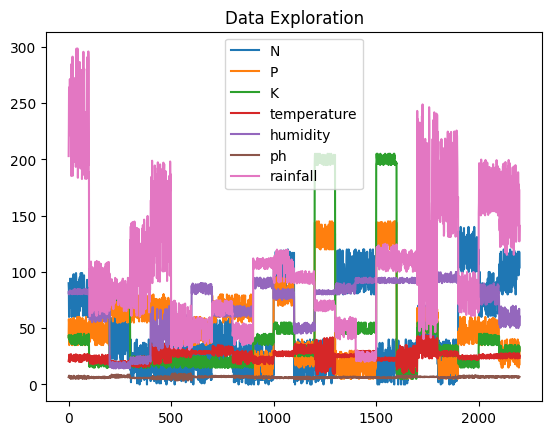

In [410]:
import matplotlib.pyplot as plt
%matplotlib inline
misdatos.plot()
plt.title('Data Exploration')

In [411]:
#import plotly.express as px
#plt.style.use('fast')
#sns.set_palette("Set2")
#for i in misdatos[:-1]:
#    fig,ax=plt.subplots(1,3,figsize=(18,4))
#    sns.histplot(data=misdatos,x=i,kde=True,bins=20, ax=ax[0])
#    sns.violinplot(data=misdatos,x=i,ax=ax[1])
#    sns.boxplot(data=misdatos,x=i,ax=ax[2])
#    plt.suptitle(f'Visualising {i}',size=20)

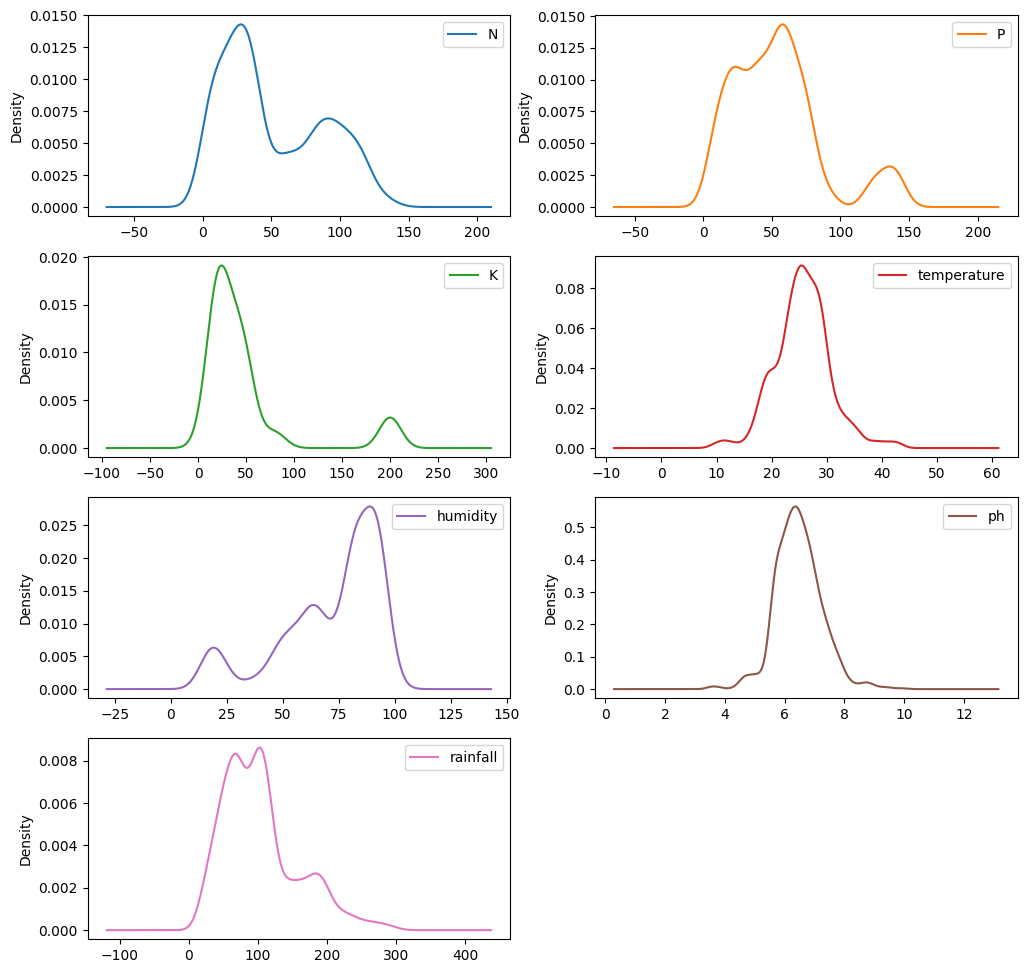

In [412]:
misdatos.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()

In [413]:
# Estadística descriptiva dataset inicial
print(misdatos.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [414]:
maiz_summary = pd.pivot_table(misdatos,index=['production'],aggfunc='mean')
maiz_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
production,,,,,,,
favorable,48.364238,50.305372,52.482708,71.638904,6.459172,106.825070,25.629085
unfavorable,47.801427,50.950059,54.784780,71.227876,6.486137,98.031833,25.595493


In [415]:
#Verificaremos cuánto nutriente requiere el cultivo de maíz
fig = go.Figure()
fig.add_trace(go.Bar(
    x=maiz_summary.index,
    y=maiz_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=maiz_summary.index,
    y=maiz_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=maiz_summary.index,
    y=maiz_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [416]:
#N,P,K ratio
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}]])

maiz_npk = maiz_summary[maiz_summary.index=='favorable']
values = [maiz_npk['N'][0], maiz_npk['P'][0], maiz_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)


In [417]:
# Relación entre temperatura y humedad
#crop_scatter = misdatos[(misdatos['production']=='favorable')]
crop_scatter = misdatos

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="production", symbol="production")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

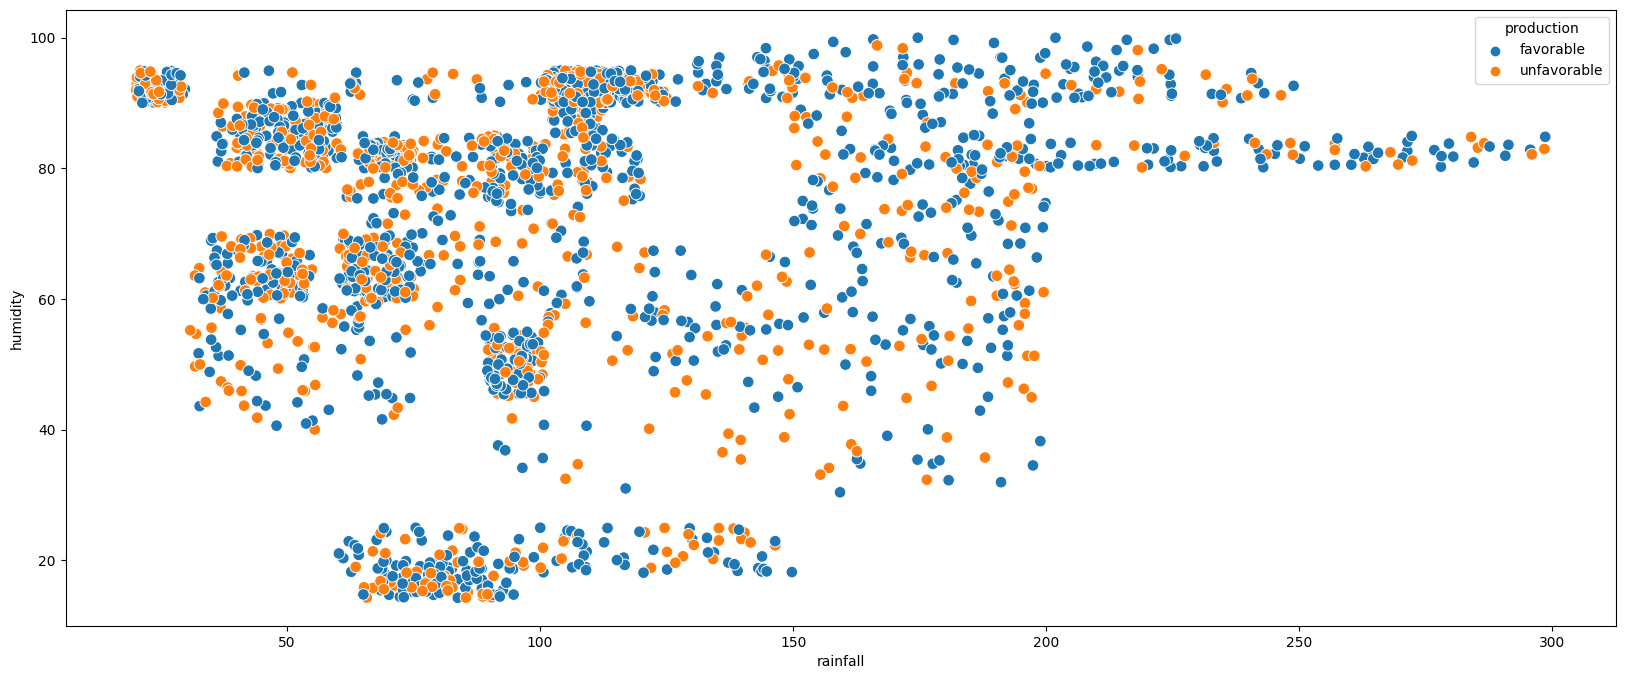

In [418]:
# In general, when precipitation increases, it increases with the degree of humidity
plt.figure(figsize=(20,8))
sns.scatterplot(crop_scatter, x="rainfall", y="humidity" , hue="production" ,s=70)
plt.show()

In [419]:
#Relación entre precipitaciones, temperatura y humedad
fig = px.bar(maiz_summary, x=maiz_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparando rainfall, temperature and humidity",
                  plot_bgcolor='white',
                 height=500)

plt.figure(figsize=(0.1,0.1))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<Figure size 10x10 with 0 Axes>

**Analisis de objetivo**

In [420]:
misdatos['production'].value_counts()

favorable      1359
unfavorable     841
Name: production, dtype: int64

In [421]:
class_mapper = {b'favorable':1,b'unfavorable':0}
misdatos['production']=misdatos['production'].replace(class_mapper)

<Axes: xlabel='production', ylabel='ph'>

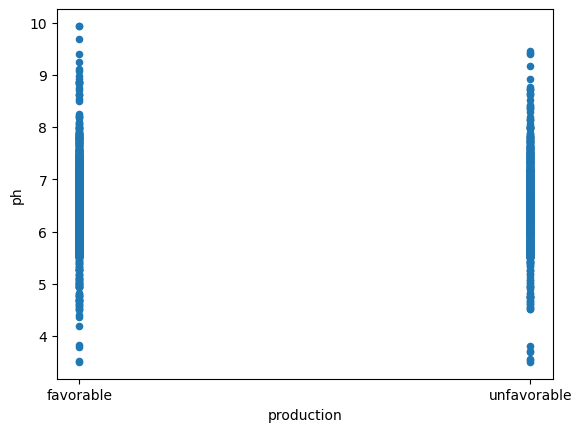

In [422]:
misdatos.plot.scatter(y='ph',x='production')

**Visualización de los atributos**



favorable           Axes(0.1,0.15;0.363636x0.75)
unfavorable    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

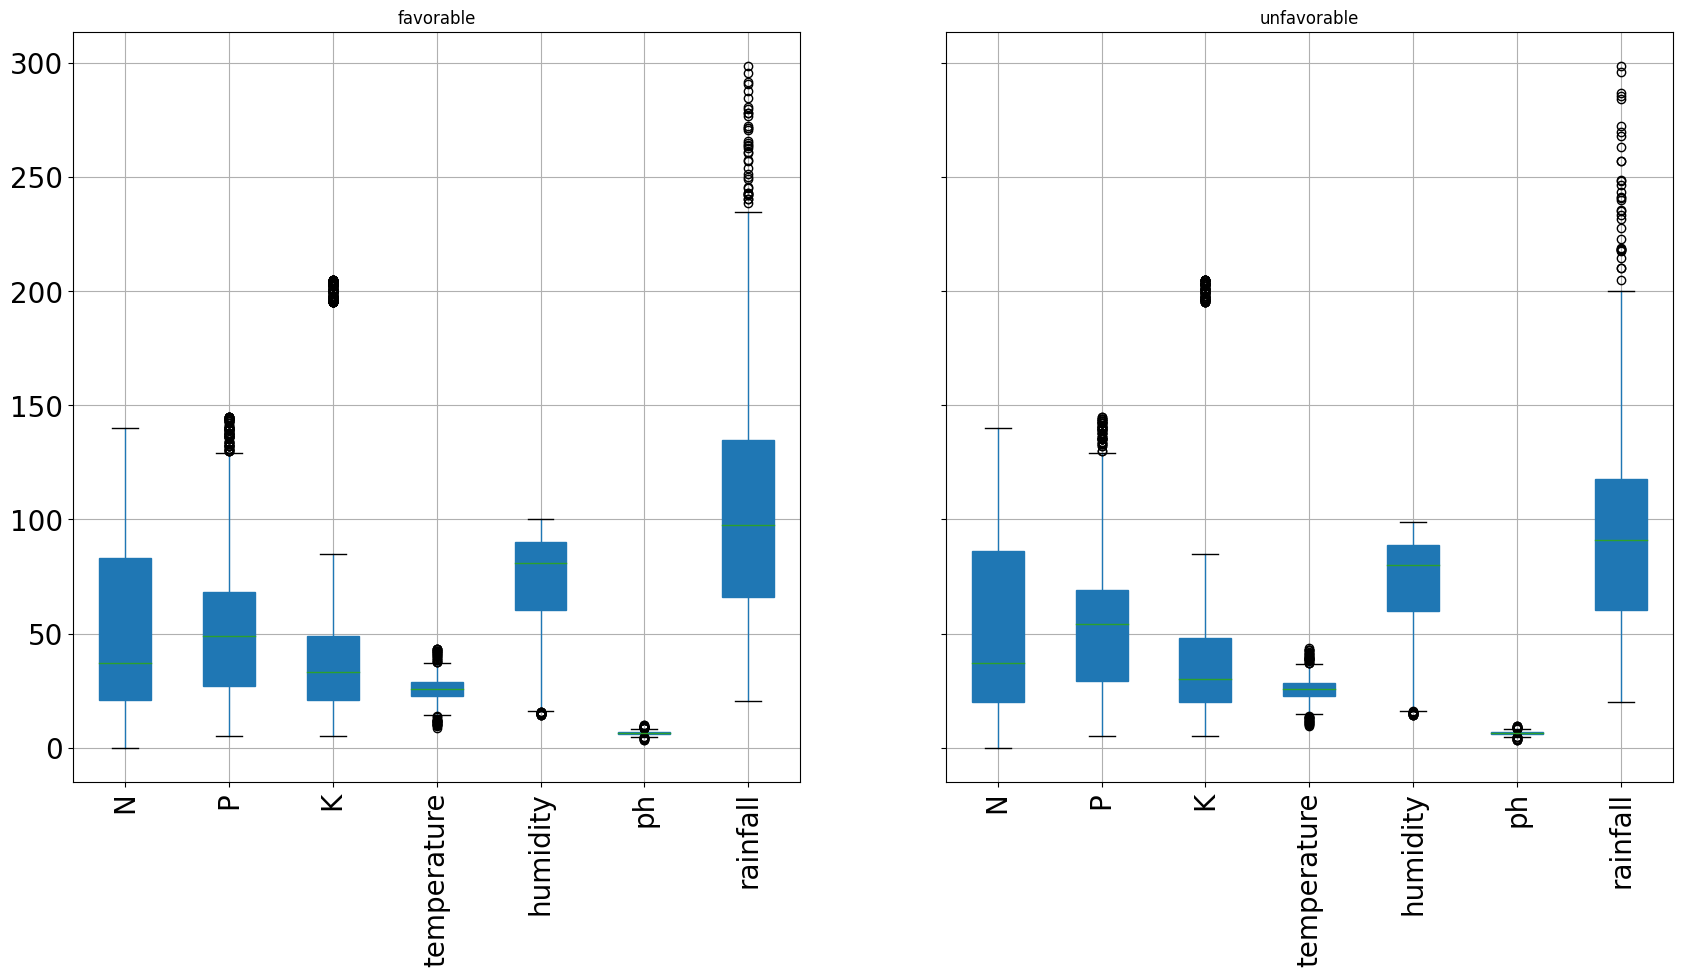

In [423]:
misdatos.groupby('production').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

In [424]:
corr_matrix = misdatos.corr()
corr_matrix['humidity'].sort_values(ascending=False)

humidity       1.000000
temperature    0.205320
K              0.190859
N              0.190688
rainfall       0.094423
ph            -0.008483
P             -0.118734
Name: humidity, dtype: float64

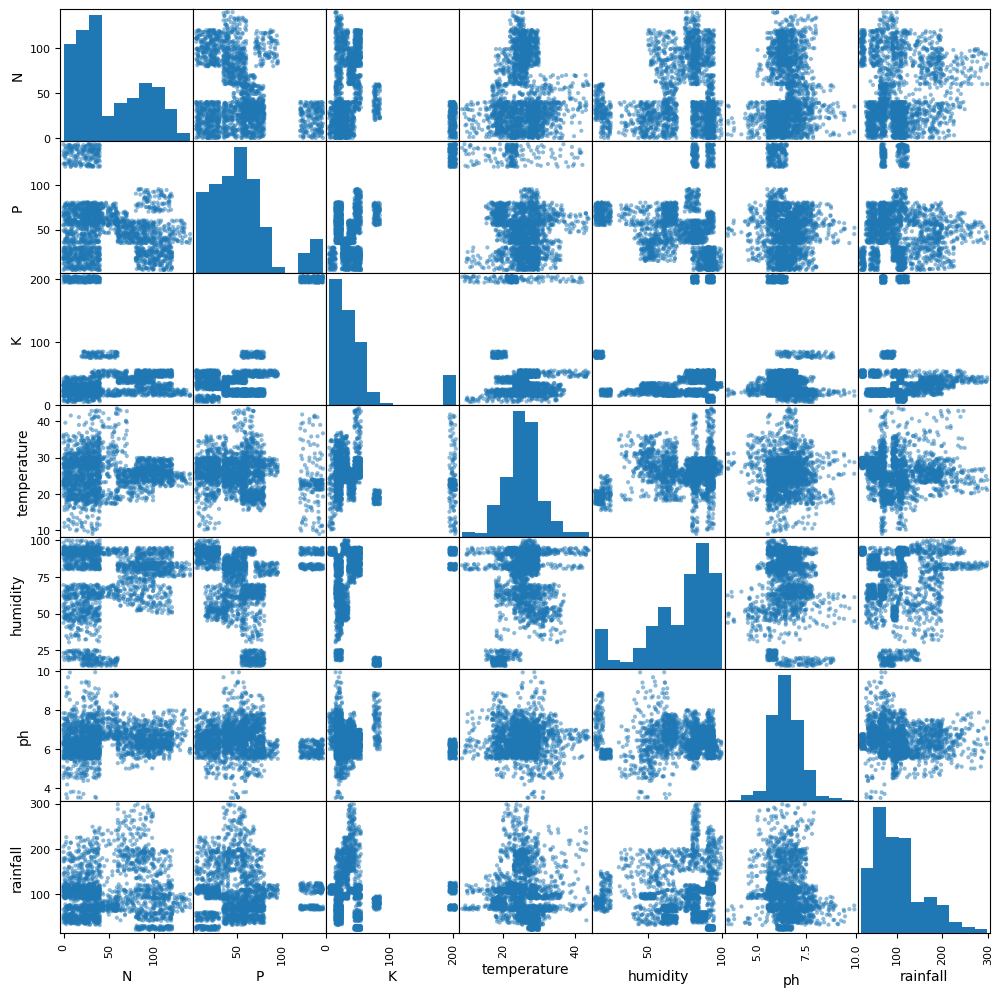

In [425]:
pd.plotting.scatter_matrix(misdatos,figsize=(12,12))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

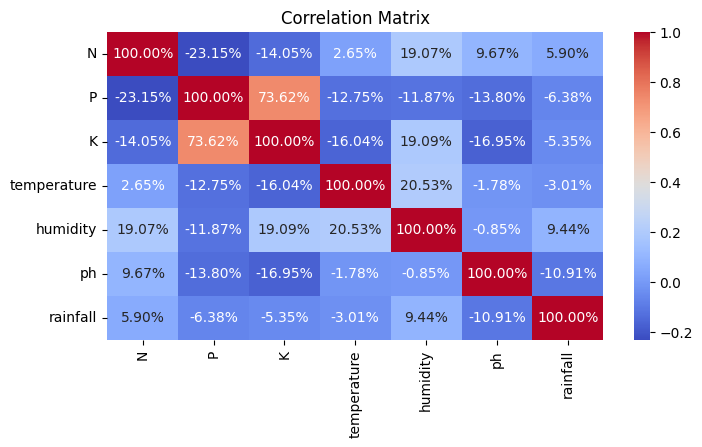

In [426]:
#Matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(misdatos.corr(),annot=True, fmt=".2%", cmap='coolwarm')
plt.title('Correlation Matrix')

In [427]:
#Declaro variables independientes y objetivos. Con esto también normalizamos para poder entrenar el modelo
#X = dfmaiz.drop('label', axis=1)
#y = dfmaiz['label']
#print (X.head ())

X = misdatos.drop('production', axis=1)
y = misdatos['production']
print (X.head ())



    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340


In [428]:
#Confirmamos que el dataset no contenga variables tipo objetos
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [429]:
# Estadística descriptiva
print(X.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


# **CONSTRUCCIÓN DE LOS MODELOS**

In [430]:
## Realizamos la partición de nuestro dataset en un conjunto de entrenamiento y otro de test (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [431]:
print(X_train.shape)
print(X_test.shape)

(1540, 7)
(660, 7)


In [432]:
#Importamos librerías
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [433]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

# **Decision Tree**

**Construimos el modelo**

In [434]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

**Predicción y matriz de clasificación**

In [435]:
predicted_values_DT = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values_DT)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values_DT))

DecisionTrees's Accuracy is:  63.030303030303024
              precision    recall  f1-score   support

   favorable       0.63      0.99      0.77       417
 unfavorable       0.44      0.02      0.03       243

    accuracy                           0.63       660
   macro avg       0.54      0.50      0.40       660
weighted avg       0.56      0.63      0.50       660



**Comparando el accuracy del conjunto de entrenamiento y prueba**

In [436]:
#Compare train and test set accuracy
y_pred_train = DecisionTree.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6253


**Revisando sobreajuste**

In [437]:
# Check for Overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(DecisionTree.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DecisionTree.score(X_test, y_test)))

Training set score: 0.6253
Test set score: 0.6303


**Matriz de Confusión**

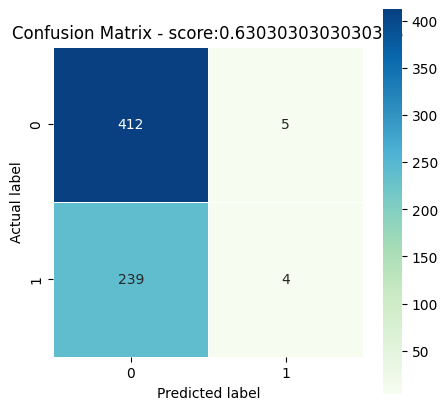

In [438]:
y_pred = DecisionTree.predict(X_test)
y_true = y_test

cm_DT = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm_DT, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'GnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_true,y_pred))
plt.title(all_sample_title, size = 12);
plt.show()

In [439]:
newdata_DT=DecisionTree.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
newdata_DT

array(['favorable'], dtype=object)

# **LightGBM (Light Gradient Boosting Machine)**

**Contruímos el modelo**

In [440]:
LightGBM = lgb.LGBMClassifier()
LightGBM.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 598, number of negative: 942
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.388312 -> initscore=-0.454415
[LightGBM] [Info] Start training from score -0.454415


LGBMClassifier()

**Predicción y matriz de clasificación**

In [441]:
predicted_values_LightGBM=LightGBM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values_LightGBM)
acc.append(x)
model.append('LightGBM')
print("LightGBM Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values_LightGBM))

LightGBM Accuracy is:  57.878787878787875
              precision    recall  f1-score   support

   favorable       0.65      0.73      0.69       417
 unfavorable       0.41      0.33      0.36       243

    accuracy                           0.58       660
   macro avg       0.53      0.53      0.52       660
weighted avg       0.56      0.58      0.57       660



**Comparando el accuracy del conjunto de entrenamiento y prueba**

In [442]:
#Compare train and test set accuracy
y_pred_train = LightGBM.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9701


**Revisando sobreajuste**

In [443]:
# Check for Overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(LightGBM.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(LightGBM.score(X_test, y_test)))

Training set score: 0.9701
Test set score: 0.5788


**Matriz de confusión**

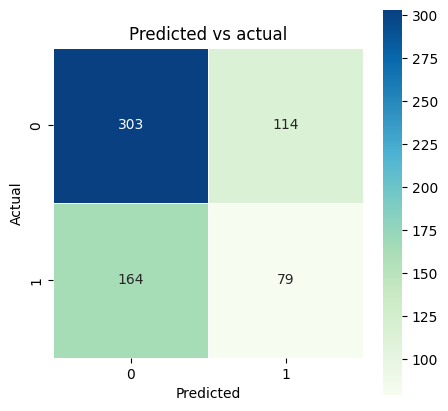

In [444]:
y_pred = LightGBM.predict(X_test)
y_true = y_test

cm_LightGBM = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm_LightGBM, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'GnBu');
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

**Revisamos la predicción**

Se usan valores aleatorios dentro del rango de cada variable

In [445]:
newdata_LightGBM=LightGBM.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
newdata_LightGBM

array(['favorable'], dtype=object)

# **Guassian Naive Bayes**

**Construimos el modelo**

In [446]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

GaussianNB()

**Predicción y matriz de clasificación**

In [447]:
predicted_values_NB = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values_NB)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values_NB))

Naive Bayes's Accuracy is:  60.0
              precision    recall  f1-score   support

   favorable       0.63      0.87      0.73       417
 unfavorable       0.38      0.14      0.20       243

    accuracy                           0.60       660
   macro avg       0.51      0.50      0.47       660
weighted avg       0.54      0.60      0.54       660



**Comparando el accuracy del conjunto de entrenamiento y prueba**

In [448]:
#Compare train and test set accuracy
y_pred_train = NaiveBayes.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5955


**Revisando sobreajuste**

In [449]:
# Check for Overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(NaiveBayes.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(NaiveBayes.score(X_test, y_test)))

Training set score: 0.5955
Test set score: 0.6000


**Matriz de confusión**

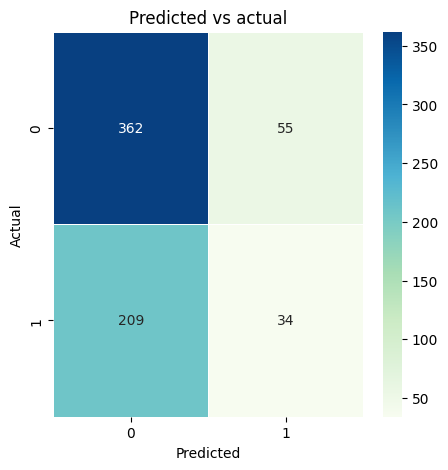

In [450]:
y_pred = NaiveBayes.predict(X_test)
y_true = y_test

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='GnBu', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [451]:
newdata_NB=NaiveBayes.predict([[30, 12, 43, 20.879744, 50, 5.5,220]])
newdata_NB

array(['favorable'], dtype='<U11')

# **K-Nearest Neighbors**

**Construimos el modelo**

In [452]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Predicción y matriz de clasificación**

In [453]:
predicted_values_KNN = knn.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values_KNN)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values_KNN))

KNN Accuracy is:  58.63636363636363
              precision    recall  f1-score   support

   favorable       0.65      0.73      0.69       417
 unfavorable       0.42      0.34      0.38       243

    accuracy                           0.59       660
   macro avg       0.54      0.53      0.53       660
weighted avg       0.57      0.59      0.57       660



**Comparando el accuracy del conjunto de entrenamiento y prueba**

In [454]:
#Compare train and test set accuracy
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6942


**Revisando sobreajuste**

In [455]:
# Check for Overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.6942
Test set score: 0.5864


**Matriz de Confusión**

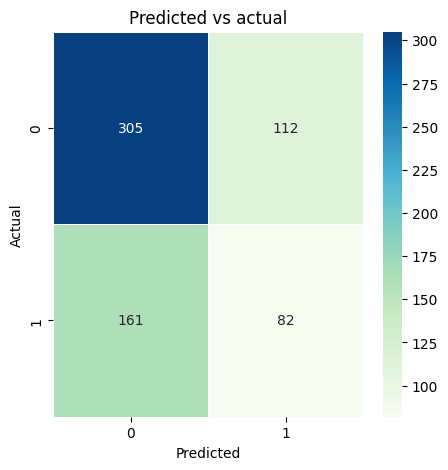

In [456]:
y_pred = knn.predict(X_test)
y_true = y_test

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='GnBu', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [457]:
newdata_KNN=knn.predict([[30, 12, 43, 20.879744, 50, 5.5,220]])
newdata_KNN

array(['unfavorable'], dtype=object)

# **COMPARANDO ACCURACY**

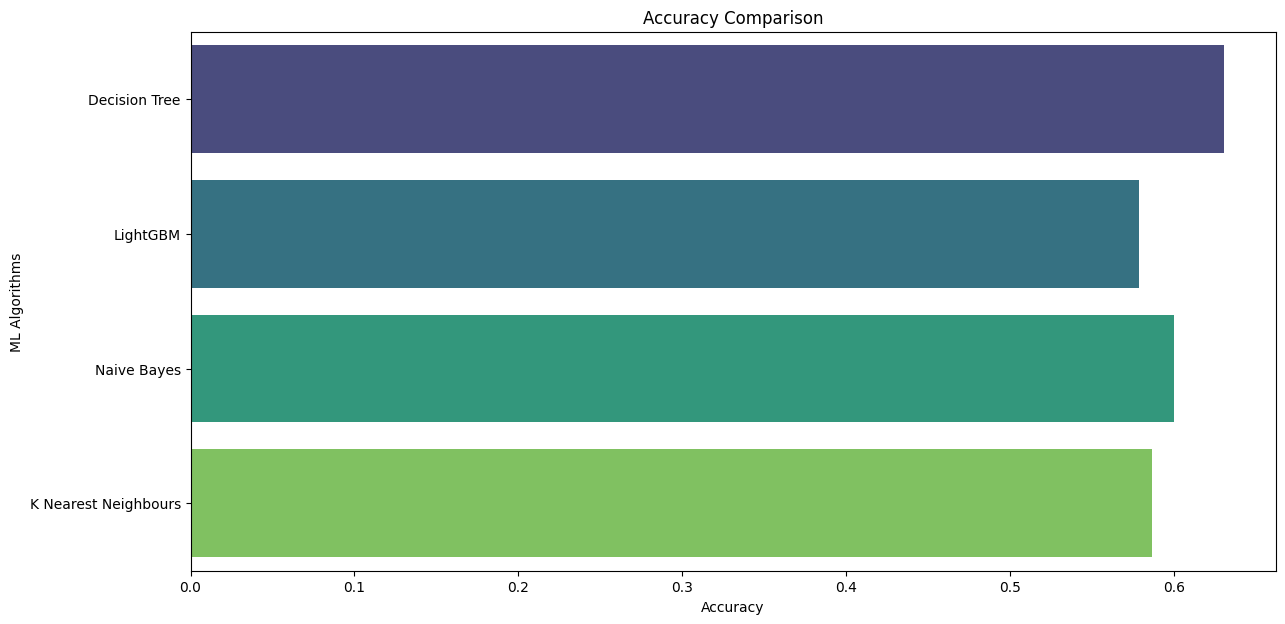

In [458]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# **AJUSTANDO HIPERPARÁMETROS**

In [459]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.55757576, 0.60151515, 0.58030303, 0.60454545, 0.58636364,
       0.58636364, 0.58181818, 0.59848485, 0.58939394, 0.59393939,
       0.57878788, 0.6       , 0.57878788, 0.5969697 , 0.6       ,
       0.61969697, 0.60151515, 0.60454545, 0.6       , 0.6030303 ])

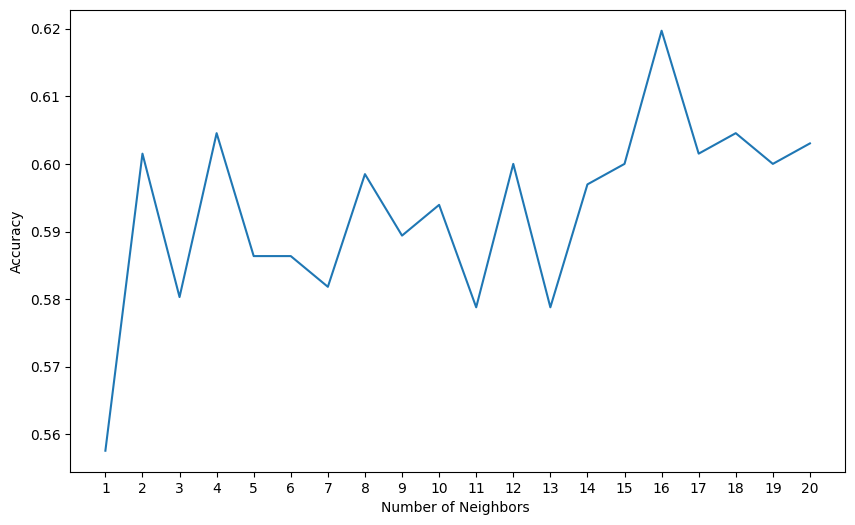

In [460]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [461]:
from sklearn.model_selection import GridSearchCV

In [462]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [463]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [464]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [465]:
g_res.best_score_

0.5999967132126324

In [466]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}

In [467]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors = 12, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=12,
                     weights='distance')

In [468]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn_1.score(X_train,y_train)
print("knn_train_accuracy = ",knn_1.score(X_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(X_test,y_test)
print("knn_test_accuracy = ",knn_1.score(X_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.5848484848484848


# **CROSS VALIDATION SCORE - TODOS LOS MODELOS**

Después de entrenar un modelo de Machine Learning con datos etiquetados, se supone que tiene que funcionar con nuevos datos. No obstante, es importante garantizar la exactitud de las predicciones del modelo en producción.

La cross-validation o validación cruzada es un método que permite probar el rendimiento de un modelo predictivo de Machine Learning.

In [469]:
from sklearn.model_selection import cross_val_score

In [470]:
features = misdatos[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = misdatos['production']

In [471]:
score = cross_val_score(DecisionTree,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.61818182 0.47727273 0.54772727 0.6        0.60454545]


In [472]:
score = cross_val_score(LightGBM,features,target,cv=5)
print('Cross validation score: ',score)

[LightGBM] [Info] Number of positive: 673, number of negative: 1087
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382386 -> initscore=-0.479432
[LightGBM] [Info] Start training from score -0.479432
[LightGBM] [Info] Number of positive: 673, number of negative: 1087
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382386 -> initscore=-0.479432
[LightGBM] [Info] Start training from score -0.479432
[LightGBM] [Info] Numb

In [473]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.61818182 0.61136364 0.61818182 0.525      0.61590909]


# **OTRA FORMA DE ANALIZARLO**

In [474]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

In [476]:
crop_dict = {
    'favorable': 1,
    'unfavorable': 2,

}
misdatos['crop_num']=misdatos['production'].map(crop_dict)

In [477]:
misdatos.head()

,N,P,K,temperature,humidity,ph,rainfall,production,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,favorable,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,favorable,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,favorable,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,favorable,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,favorable,1


In [478]:
misdatos=misdatos.drop('production',axis=1)

In [479]:
X=misdatos.drop('crop_num',axis=1)
Y=misdatos['crop_num']

In [480]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [481]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [482]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [483]:
X_train.shape

(1760, 7)

In [484]:
X_test.shape

(440, 7)

In [485]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [486]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score




In [487]:
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")
    print(f"{name}  with precision : {precision_score(Y_test,ypred,average='micro')}")
    print(f"{name}  with recall : {recall_score(Y_test,ypred,average='micro')}")
    print(f"{name}  with f1_score : {f1_score(Y_test,ypred,average='macro')}")

Logistic Regression  with accuracy : 0.6295454545454545
Logistic Regression  with precision : 0.6295454545454545
Logistic Regression  with recall : 0.6295454545454545
Logistic Regression  with f1_score : 0.39207459207459205
Naive Bayes  with accuracy : 0.6022727272727273
Naive Bayes  with precision : 0.6022727272727273
Naive Bayes  with recall : 0.6022727272727273
Naive Bayes  with f1_score : 0.423544825004679
Support Vector Machine  with accuracy : 0.6272727272727273
Support Vector Machine  with precision : 0.6272727272727273
Support Vector Machine  with recall : 0.6272727272727273
Support Vector Machine  with f1_score : 0.3854748603351955
K-Nearest Neighbors  with accuracy : 0.5431818181818182
K-Nearest Neighbors  with precision : 0.5431818181818182
K-Nearest Neighbors  with recall : 0.5431818181818182
K-Nearest Neighbors  with f1_score : 0.4892319420621307
Decision Tree  with accuracy : 0.5431818181818182
Decision Tree  with precision : 0.5431818181818182
Decision Tree  with recall 

**DECISION TREE**

In [488]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,Y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

#print(classification_report(Y_test,predicted_values))

DecisionTrees's Accuracy is:  61.59090909090909


In [489]:
print('Decision Tree Accuracy on training set: ',
      DecisionTree.score(X_train, Y_train))
print('Decision Tree Accuracy on test set: ',
      DecisionTree.score(X_test, Y_test))

Decision Tree Accuracy on training set:  0.6255681818181819
Decision Tree Accuracy on test set:  0.615909090909091


In [490]:
# Save Model as Pickel
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

**RANDOM FOREST**

In [491]:
RandomForest = RandomForestClassifier(n_estimators=20, random_state=0)

RandomForest.fit(X_train, Y_train)

predicted_values = RandomForest.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('RandomForest')
print("Random Forest's Accuracy is: ", x*100)

#print(classification_report(Y_test, predicted_values))

Random Forest's Accuracy is:  58.63636363636363


In [492]:
print('Random Forest Accuracy on training set: ',
      RandomForest.score(X_train, Y_train))
print('Random Forest Accuracy on test set: ',
      RandomForest.score(X_test, Y_test))

Random Forest Accuracy on training set:  0.9926136363636363
Random Forest Accuracy on test set:  0.5863636363636363


In [493]:
# Save Model as Pickel
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForest, RF_Model_pkl)
RF_Model_pkl.close()

**GAUSSIAN NAIVE BAYES**

In [494]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,Y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

#print(classification_report(Y_test,predicted_values))

Naive Bayes's Accuracy is:  0.6022727272727273


In [495]:
print('NaiveBayes Accuracy on training set: ',
      NaiveBayes.score(X_train, Y_train))
print('NaiveBayes Accuracy on test set: ', NaiveBayes.score(X_test, Y_test))

NaiveBayes Accuracy on training set:  0.6119318181818182
NaiveBayes Accuracy on test set:  0.6022727272727273


In [496]:
# Save Model as Pickel
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

**GRADIENT BOOSTING**

In [ ]:
GradientBoosting = GradientBoostingClassifier()

GradientBoosting.fit(X_train,Y_train)

predicted_values = GradientBoosting.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Gradient Boosting')
print("Gradient Boosting's Accuracy is: ", x)

#print(classification_report(Y_test,predicted_values))

In [ ]:
print('GradientBoosting Accuracy on training set: ',
      NaiveBayes.score(X_train, Y_train))
print('GradientBoosting Accuracy on test set: ', NaiveBayes.score(X_test, Y_test))

In [ ]:
# Save Model as Pickel
DT_pkl_filename = 'GradientBoosting.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(GradientBoosting, DT_Model_pkl)
DT_Model_pkl.close()

**K-NEAREST NEIGHBORS**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train,Y_train)

predicted_values = knn.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('K-Nearest Neighbors')
print("KNN Accuracy is: ", x)

#print(classification_report(Y_test,predicted_values))


In [ ]:
print('KNeighbors Accuracy on training set: ',
      knn.score(X_train, Y_train))
print('KNeighbors Accuracy on test set: ', knn.score(X_test, Y_test))

In [ ]:
# Save Model as Pickel
DT_pkl_filename = 'KNN.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(knn, DT_Model_pkl)
DT_Model_pkl.close()

In [ ]:
#Comparando entre modelos
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model, palette=sns.color_palette("mako"))

**Revisamos el accuracy de los modelos**

In [ ]:
# Check Model's Accuracy
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

**Predicción con Decision Tree**

In [ ]:
newdata_DecisionTree=DecisionTree.predict([[50,45,34,23.004459,82.320763,7.840207,	163.964248]])
newdata_DecisionTree

**Predicción con Naive Bayes**

In [ ]:
newdata_NaiveBayes=NaiveBayes.predict([[50,45,34,23.004459,82.320763,7.840207,	163.964248]])
newdata_NaiveBayes

**Predicción con KNN**

In [ ]:
newdata_KN=knn.predict([[50,45,34,23.004459,82.320763,7.840207,	163.964248]])
newdata_KN